Secara keseluruhan, tujuan dari notebook ini adalah untuk melakukan pembersihan dan persiapan data (Data Cleaning and Preparation) dari beberapa sumber data pariwisata yang berbeda. Proses ini mencakup pemuatan data dari beberapa file CSV, penanganan nilai yang hilang (missing values), penggabungan data dari sumber yang berbeda menjadi satu dataset komprehensif, dan terakhir, penanganan outlier (pencilan data) untuk menghasilkan dataset yang bersih dan siap untuk analisis atau pemodelan lebih lanjut.

# Impor Pustaka dan Pemuatan Data Awal

#### **Analisis Input**

* **Tujuan Kode:**
    * Baris 1-4: Mengimpor pustaka (library) yang diperlukan untuk analisis data. Ini adalah langkah pertama yang fundamental dalam hampir semua proyek data science.
    * Baris 6-9: Membaca empat file data yang berbeda (`.csv`) ke dalam struktur data yang disebut DataFrame menggunakan pustaka `pandas`. Setiap DataFrame mewakili satu set data: paket wisata (`df1`), rating tempat wisata (`df2`), detail tempat wisata (`df3`), dan data pengguna (`df4`).
    * Baris 11: Menampilkan konten dari DataFrame pertama (`df1`) untuk melakukan inspeksi visual awal terhadap data paket wisata.
* **Fungsi Pustaka/Modul:**
    * `pandas` (sebagai `pd`): Pustaka utama untuk manipulasi dan analisis data di Python. Fungsi `pd.read_csv()` secara spesifik digunakan untuk membaca data dari file Comma-Separated Values (CSV) dan mengubahnya menjadi DataFrame, yang merupakan tabel data dua dimensi.
    * `numpy` (sebagai `np`): Pustaka untuk komputasi numerik. Meskipun tidak digunakan secara langsung di sel ini, pustaka ini sering kali menjadi dependensi `pandas` dan sangat berguna untuk operasi matematika pada data.
    * `matplotlib.pyplot` (sebagai `plt`): Pustaka dasar untuk membuat visualisasi data seperti grafik dan plot.
    * `seaborn` (sebagai `sns`): Pustaka yang dibangun di atas `matplotlib` untuk membuat visualisasi statistik yang lebih menarik dan informatif dengan lebih sedikit kode.
* **Proses Data:**
    * Data dari empat file CSV yang terpisah dibaca dari lokasi `/content/` dan dimuat ke dalam memori sebagai empat objek DataFrame `pandas` yang berbeda. Tidak ada modifikasi data yang terjadi pada langkah ini selain pemuatan itu sendiri.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 =  pd.read_csv('/content/package_tourism.csv')
df2 = pd.read_csv('/content/tourism_rating.csv')
df3 = pd.read_csv('/content/tourism_with_id.csv')
df4 = pd.read_csv('/content/user.csv')

df1

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN
...,...,...,...,...,...,...,...
95,96,Surabaya,Ekowisata Mangrove Wonorejo,Taman Harmoni Keputih,Taman Kunang-Kunang,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank
96,97,Surabaya,Ciputra Waterpark,Kenjeran Park,Kebun Binatang Surabaya,Food Junction Grand Pakuwon,| Atlantis Land Surabaya
97,98,Surabaya,Museum Kesehatan Dr. Adhyatma,Patung Buddha Empat Rupa,Taman Hiburan Rakyat,Taman Bungkul,Taman Flora Bratang Surabaya
98,99,Surabaya,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank,Surabaya Museum (Gedung Siola),Museum Mpu Tantular,Taman Air Mancur Menari Kenjeran


#### **Analisis Output**

* **Deskripsi Output:** Output yang ditampilkan adalah representasi tabel dari DataFrame `df1`. Ini menunjukkan 100 baris pertama dan terakhir dari data, beserta 7 kolomnya: `Package`, `City`, `Place_Tourism1`, `Place_Tourism2`, `Place_Tourism3`, `Place_Tourism4`, dan `Place_Tourism5`.
* **Dukungan Tujuan:** Output ini memberikan gambaran awal yang penting tentang dataset paket wisata. Dari sini, kita bisa melihat:
    * **Struktur Data:** Data diatur berdasarkan paket, di mana setiap baris adalah satu paket wisata dengan beberapa tempat wisata yang tercantum di kolom terpisah.
    * **Identifikasi Masalah:** Kita dapat dengan jelas melihat adanya nilai `NaN` (Not a Number) di kolom `Place_Tourism4` dan `Place_Tourism5`. Ini adalah representasi standar `pandas` untuk data yang hilang (missing values) dan ini langsung menginformasikan langkah selanjutnya dalam pembersihan data, yaitu menangani nilai-nilai yang hilang ini.


# Informasi DataFrame `df1`

#### **Analisis Input**

* **Tujuan Kode:** Baris ini menggunakan metode `.info()` pada DataFrame `df1` untuk mendapatkan ringkasan teknis yang ringkas. Tujuannya adalah untuk memahami struktur DataFrame secara lebih mendalam daripada sekadar melihat datanya.
* **Proses Data:** Metode `.info()` tidak memodifikasi data, tetapi menganalisis metadata DataFrame.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


#### **Analisis Output**

* **Deskripsi Output:** Outputnya adalah ringkasan tekstual yang menampilkan:
    * `RangeIndex: 100 entries, 0 to 99`: Menunjukkan bahwa DataFrame memiliki 100 baris, dengan indeks dari 0 hingga 99.
    * `Data columns (total 7 columns)`: Menunjukkan jumlah total kolom.
    * Tabel Kolom: Setiap baris dalam tabel ini menjelaskan satu kolom, termasuk:
        * `Non-Null Count`: Jumlah nilai yang tidak kosong. Ini adalah informasi krusial. Kita lihat `Place_Tourism4` hanya memiliki 66 nilai non-null dan `Place_Tourism5` hanya 39, yang berarti sisanya adalah nilai null.
        * `Dtype`: Tipe data dari setiap kolom (`int64` untuk angka bulat, `object` untuk teks/string).
    * `memory usage: 5.6+ KB`: Perkiraan jumlah memori yang digunakan oleh DataFrame.
* **Dukungan Tujuan:** Output ini secara kuantitatif mengkonfirmasi observasi visual dari sel sebelumnya. Ini memberikan angka pasti untuk nilai yang hilang (100 - 66 = 34 null di `Place_Tourism4`; 100 - 39 = 61 null di `Place_Tourism5`). Informasi ini sangat penting untuk merencanakan strategi pembersihan data.

# Menghitung Nilai Null di `df1`

#### **Analisis Input**

* **Tujuan Kode:** Tujuan dari baris ini adalah untuk secara eksplisit menghitung dan menampilkan jumlah nilai null di setiap kolom `df1`.
* **Proses Data:**
    1.  `df1.isnull()`: Langkah ini membuat DataFrame boolean dengan dimensi yang sama seperti `df1`. Setiap sel akan berisi `True` jika sel asli di `df1` adalah null (`NaN`), dan `False` jika tidak.
    2.  `.sum()`: Metode ini kemudian diterapkan pada DataFrame boolean tersebut. Dalam `pandas`, `True` dihitung sebagai 1 dan `False` sebagai 0. Dengan menjumlahkan nilai-nilai ini per kolom, kita mendapatkan total nilai `True` (yaitu, total nilai null) untuk setiap kolom.


In [ ]:
df1.isnull().sum()

,0
Package,0
City,0
Place_Tourism1,0
Place_Tourism2,0
Place_Tourism3,0
Place_Tourism4,34
Place_Tourism5,61


#### **Analisis Output**

* **Deskripsi Output:** Outputnya adalah sebuah `pandas` Series, yang pada dasarnya adalah tabel satu dimensi. Ini mencantumkan nama setiap kolom dan jumlah nilai null di sebelahnya.
* **Dukungan Tujuan:** Output ini menyajikan informasi yang sama dengan `.info()` tetapi dengan cara yang lebih ringkas dan fokus hanya pada nilai yang hilang. Ini adalah cara standar dan cepat untuk memverifikasi di mana letak masalah data yang hilang, mengkonfirmasi bahwa `Place_Tourism4` memiliki 34 nilai null dan `Place_Tourism5` memiliki 61.


# Mengisi Nilai Null dan Verifikasi

In [ ]:
df1.fillna("Tidak Ada", inplace=True)

In [ ]:
df1.isnull().sum()

,0
Package,0
City,0
Place_Tourism1,0
Place_Tourism2,0
Place_Tourism3,0
Place_Tourism4,0
Place_Tourism5,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
df2.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


In [ ]:
df3

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
df3.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [ ]:
df3.drop(columns=['Coordinate', 'Unnamed: 11', 'Unnamed: 12'], inplace=True)
df3

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,-7.433859,112.719906
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,-7.291347,112.739822
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,-7.275296,112.754938
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,-7.294330,112.761753


In [ ]:
df3['Time_Minutes'].fillna(0, inplace=True)
df3

<ipython-input-31-1905401480>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Time_Minutes'].fillna(0, inplace=True)


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,0.0,-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,-7.433859,112.719906
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,0.0,-7.291347,112.739822
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,-7.275296,112.754938
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,0.0,-7.294330,112.761753


In [ ]:
df4

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [ ]:
df4.isnull().sum()

,0
User_Id,0
Location,0
Age,0


In [ ]:
# 2. Merge rating dengan user
df_user_ratings = pd.merge(df2, df4, on='User_Id', how='left')

# 3. Merge user-rating dengan data tempat wisata
df_full = pd.merge(df_user_ratings, df3, on='Place_Id', how='left')

# 4. (Opsional) Gabungkan juga dengan data package jika ingin tahu tempat berada di paket mana
# Bentuk long format dari df_packages: dari Place_Tourism1-5 jadi satu kolom
package_long = pd.melt(
    df1,
    id_vars=['Package', 'City'],
    value_vars=['Place_Tourism1', 'Place_Tourism2', 'Place_Tourism3', 'Place_Tourism4', 'Place_Tourism5'],
    var_name='Place_Order',
    value_name='Place_Name'
).dropna(subset=['Place_Name'])

# Merge berdasarkan nama tempat (pastikan nama tempat di df_places juga bersih)
df_full_with_package = pd.merge(df_full, package_long, left_on='Place_Name', right_on='Place_Name', how='left')
df_full_with_package

,User_Id,Place_Id,Place_Ratings,Location,Age,Place_Name,Description,Category,City_x,Price,Rating,Time_Minutes,Lat,Long,Package,City_y,Place_Order
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,-7.770542,110.489416,NaN,NaN,NaN
1,1,344,2,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,0.0,-6.948877,110.389329,63.0,Semarang,Place_Tourism2
2,1,344,2,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,0.0,-6.948877,110.389329,78.0,Semarang,Place_Tourism2
3,1,5,5,"Semarang, Jawa Tengah",20,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,-6.124190,106.839134,NaN,NaN,NaN
4,1,373,3,"Semarang, Jawa Tengah",20,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,-7.264599,110.404602,73.0,Semarang,Place_Tourism3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,300,425,2,"Ponorogo, Jawa Timur",26,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,0.0,-7.247796,112.799824,87.0,Surabaya,Place_Tourism2
12378,300,64,4,"Ponorogo, Jawa Timur",26,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,45.0,-6.204630,106.836532,NaN,NaN,NaN
12379,300,311,3,"Ponorogo, Jawa Timur",26,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,150.0,-6.829411,107.687467,NaN,NaN,NaN
12380,300,279,4,"Ponorogo, Jawa Timur",26,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,0.0,-6.925963,107.635428,NaN,NaN,NaN


In [ ]:
df_full_with_package.drop(columns=['Place_Ratings'], inplace=True)
df_full_with_package

,User_Id,Place_Id,Location,Age,Place_Name,Description,Category,City_x,Price,Rating,Time_Minutes,Lat,Long,Package,City_y,Place_Order
0,1,179,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,-7.770542,110.489416,NaN,NaN,NaN
1,1,344,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,0.0,-6.948877,110.389329,63.0,Semarang,Place_Tourism2
2,1,344,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,0.0,-6.948877,110.389329,78.0,Semarang,Place_Tourism2
3,1,5,"Semarang, Jawa Tengah",20,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,-6.124190,106.839134,NaN,NaN,NaN
4,1,373,"Semarang, Jawa Tengah",20,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,-7.264599,110.404602,73.0,Semarang,Place_Tourism3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,300,425,"Ponorogo, Jawa Timur",26,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,0.0,-7.247796,112.799824,87.0,Surabaya,Place_Tourism2
12378,300,64,"Ponorogo, Jawa Timur",26,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,45.0,-6.204630,106.836532,NaN,NaN,NaN
12379,300,311,"Ponorogo, Jawa Timur",26,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,150.0,-6.829411,107.687467,NaN,NaN,NaN
12380,300,279,"Ponorogo, Jawa Timur",26,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,0.0,-6.925963,107.635428,NaN,NaN,NaN


In [ ]:
# Menghapus kolom 'City_y', 'Place_Order', dan 'Package' jika masih ada
df_full_with_package.drop(columns=['City_y', 'Place_Order', 'Package'], inplace=True, errors='ignore')
df_full_with_package

,User_Id,Place_Id,Location,Age,Place_Name,Description,Category,City_x,Price,Rating,Time_Minutes,Lat,Long
0,1,179,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,-7.770542,110.489416
1,1,344,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,0.0,-6.948877,110.389329
2,1,344,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,0.0,-6.948877,110.389329
3,1,5,"Semarang, Jawa Tengah",20,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,-6.124190,106.839134
4,1,373,"Semarang, Jawa Tengah",20,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,-7.264599,110.404602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,300,425,"Ponorogo, Jawa Timur",26,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,0.0,-7.247796,112.799824
12378,300,64,"Ponorogo, Jawa Timur",26,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,45.0,-6.204630,106.836532
12379,300,311,"Ponorogo, Jawa Timur",26,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,150.0,-6.829411,107.687467
12380,300,279,"Ponorogo, Jawa Timur",26,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,0.0,-6.925963,107.635428


# Analisis Kemiringan (Skewness) dan Distribusi

#### **Analisis Input**

* **Tujuan Kode:** Tujuan blok kode ini adalah untuk menganalisis distribusi dari setiap kolom numerik dalam dataset gabungan. Ini dilakukan untuk dua alasan utama: 1) Memahami karakteristik statistik dasar dari data, dan 2) Secara visual dan kuantitatif mengidentifikasi adanya kemiringan (skewness) dan potensi outlier, yang akan ditangani di langkah berikutnya.
* **Fungsi Pustaka/Modul:**
    * `seaborn` (`sns`): Digunakan untuk membuat histogram (`sns.histplot`). Histogram adalah representasi grafis dari distribusi data numerik.
    * `matplotlib.pyplot` (`plt`): Digunakan untuk memberikan judul pada plot (`plt.title`) dan menampilkannya (`plt.show`).
* **Proses Data:**
    1.  `df_full_with_package[col].skew()`: Untuk setiap kolom numerik, metode `.skew()` menghitung kemiringan distribusi.
    2.  `sns.histplot(...)`: Untuk setiap kolom yang sama, `seaborn` digunakan untuk membuat plot histogram. Argumen `kde=True` menambahkan lapisan *Kernel Density Estimate*, yang merupakan versi kurva yang lebih halus dari histogram, membantu dalam melihat bentuk distribusi.


Age skewness: 0.02


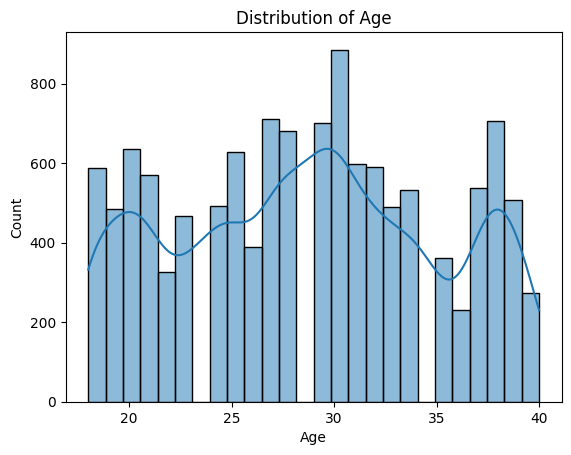

Price skewness: 7.88


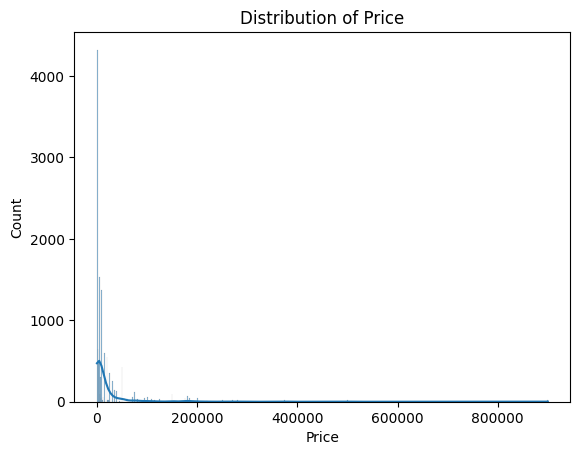

Rating skewness: -0.59


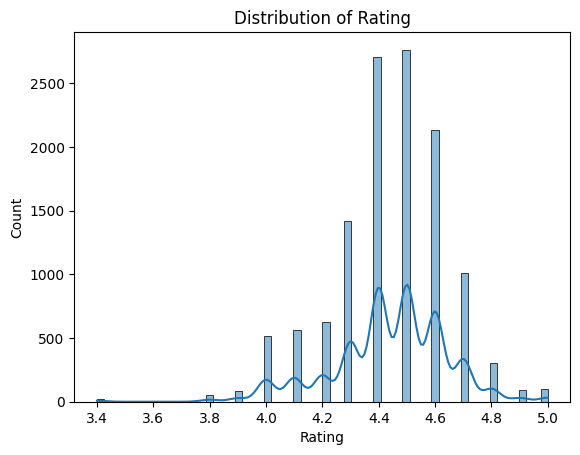

Time_Minutes skewness: 1.71


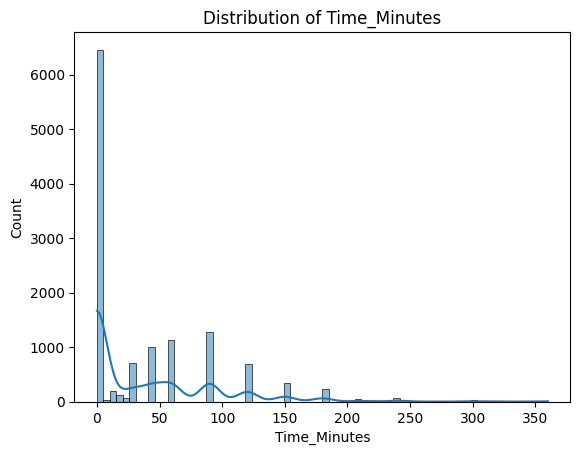

Lat skewness: 2.80


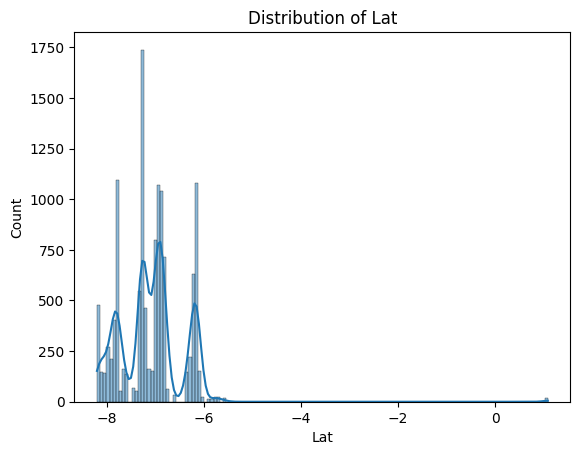

Long skewness: 0.18


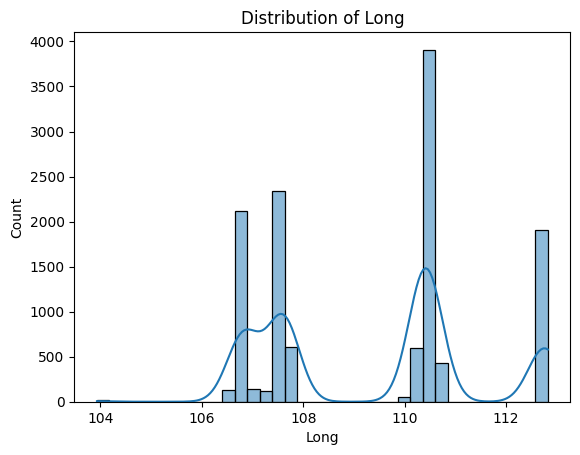

In [ ]:
# Kolom numerik
numeric_cols = ['Age', 'Price', 'Rating', 'Time_Minutes', 'Lat', 'Long']

# Cek skewness dan plot distribusi
for col in numeric_cols:
    print(f"{col} skewness: {df_full_with_package[col].skew():.2f}")
    sns.histplot(df_full_with_package[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### **Analisis Output**

* **Deskripsi Output:** Outputnya adalah serangkaian cetakan teks dan grafik untuk setiap kolom numerik (`Age`, `Price`, `Rating`, dll.).
    * **Teks Skewness:** Misalnya, `Price skewness: 7.88` dan `Lat skewness: 2.80`.
    * **Grafik Histogram:** Setiap grafik menunjukkan frekuensi nilai dalam rentang tertentu.
* **Dukungan Tujuan & Hubungan Visual:**
    * **`Age`:** Nilai skewness 0.02 sangat dekat dengan 0, dan histogramnya terlihat hampir simetris (seperti lonceng), yang mengindikasikan distribusi normal. Ini berarti data usia tersebar merata di sekitar nilai rata-rata.
    * **`Price`:** Nilai skewness 7.88 sangat positif. Ini secara visual dikonfirmasi oleh histogramnya yang sangat miring ke kanan: sebagian besar tempat wisata memiliki harga rendah (batang tinggi di sisi kiri), tetapi ada beberapa tempat dengan harga yang sangat tinggi yang membentuk "ekor" panjang ke kanan. Ini adalah indikasi kuat adanya outlier pada harga.
    * **`Rating`:** Skewness -0.59 menunjukkan sedikit kemiringan ke kiri. Histogramnya menunjukkan bahwa sebagian besar rating terkonsentrasi di nilai tinggi (4.0 ke atas).
    * Hubungan antara nilai skewness dan bentuk histogram sangat langsung. Visualisasi ini membuat konsep statistik abstrak (skewness) menjadi mudah dipahami dan mengarahkan perhatian pada kolom `Price` dan `Time_Minutes` sebagai kandidat utama untuk pembersihan outlier.


# Deteksi dan Penghapusan Outlier dengan IQR

#### **Analisis Input**

* **Tujuan Kode:** Tujuan utama sel ini adalah untuk secara sistematis mengidentifikasi dan menghapus outlier dari kolom numerik menggunakan metode *Interquartile Range* (IQR). Tujuannya adalah untuk membuat dataset lebih kuat dan mengurangi pengaruh nilai-nilai ekstrem pada analisis atau model di masa depan.
* **Fungsi Pustaka/Modul:**
    * `matplotlib.pyplot` (`plt`): Digunakan untuk membuat dan menampilkan visualisasi boxplot.
* **Proses Data:**
    1.  **Visualisasi Awal (Boxplot):** Boxplot dibuat untuk memvisualisasikan outlier sebelum dihapus. Titik-titik di luar "kumis" boxplot secara visual mewakili outlier.
    2.  **Fungsi `remove_outliers_iqr`:**
        * `Q1 = cleaned_df[col].quantile(0.25)`: Menghitung kuartil pertama (persentil ke-25).
        * `Q3 = cleaned_df[col].quantile(0.75)`: Menghitung kuartil ketiga (persentil ke-75).
        * `IQR = Q3 - Q1`: Menghitung rentang interkuartil.
        * `lower = Q1 - 1.5 * IQR` dan `upper = Q3 + 1.5 * IQR`: Menghitung batas bawah dan atas. Ini adalah definisi standar untuk outlier dalam metode IQR.
        * `cleaned_df = cleaned_df[...]`: Ini adalah langkah kunci. DataFrame difilter untuk hanya menyertakan baris di mana nilai untuk kolom yang sedang diproses berada di antara `lower` dan `upper`. Proses ini diulang untuk setiap kolom numerik.
    3.  **Visualisasi Akhir (Boxplot):** Boxplot baru dibuat dari `df_cleaned` untuk membandingkan dan memverifikasi hasil pembersihan.
    4.  **Perbandingan Ukuran:** Jumlah baris sebelum (`len(df_full_with_package)`) dan sesudah (`len(df_cleaned)`) dicetak untuk mengukur berapa banyak data yang dihilangkan sebagai outlier.


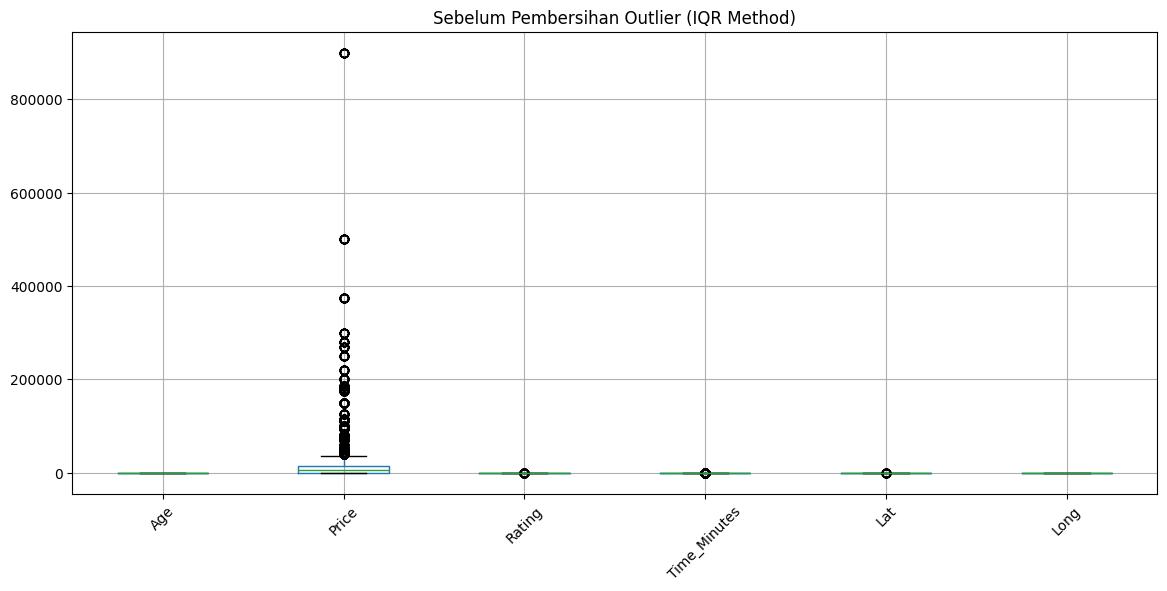

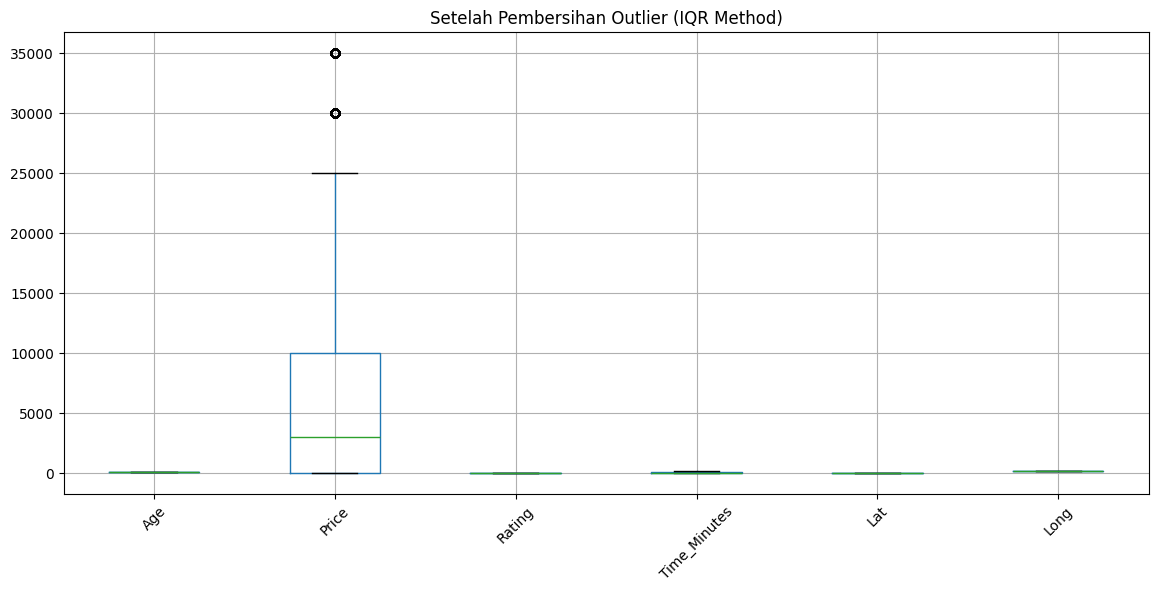

Jumlah data sebelum pembersihan: 12382
Jumlah data setelah pembersihan: 10577


In [ ]:
# --- 2. Pilih Kolom Numerik ---
numeric_cols = ['Age', 'Price', 'Rating', 'Time_Minutes', 'Lat', 'Long']

# --- 3. Visualisasi Sebelum Pembersihan (Boxplot) ---
plt.figure(figsize=(14, 6))
df_full_with_package[numeric_cols].boxplot()
plt.title("Sebelum Pembersihan Outlier (IQR Method)")
plt.xticks(rotation=45)
plt.show()

# --- 4. Fungsi Deteksi & Hapus Outlier Menggunakan IQR ---
def remove_outliers_iqr(data, columns):
    cleaned_df = data.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
    return cleaned_df

# --- 5. Hapus Outliers ---
df_cleaned = remove_outliers_iqr(df_full_with_package, numeric_cols)

# --- 6. Visualisasi Setelah Pembersihan (Boxplot) ---
plt.figure(figsize=(14, 6))
df_cleaned[numeric_cols].boxplot()
plt.title("Setelah Pembersihan Outlier (IQR Method)")
plt.xticks(rotation=45)
plt.show()

# --- 7. (Opsional) Bandingkan Jumlah Data ---
print(f"Jumlah data sebelum pembersihan: {len(df_full_with_package)}")
print(f"Jumlah data setelah pembersihan: {len(df_cleaned)}")

#### **Analisis Output**

* **Deskripsi Output:**
    1.  **Boxplot Awal:** Grafik ini dengan jelas menunjukkan adanya banyak outlier, terutama pada kolom `Price` yang memiliki banyak titik jauh di atas batas atas plot.
    2.  **Boxplot Akhir:** Grafik ini menunjukkan distribusi yang jauh lebih "padat". "Kumis" dari boxplot sekarang lebih pendek, dan sebagian besar titik outlier telah hilang. Ini adalah bukti visual bahwa metode IQR telah berhasil.
    3.  **Jumlah Data:** Output teks `Jumlah data sebelum pembersihan: 12382` dan `Jumlah data setelah pembersihan: 10577` menunjukkan bahwa 1.805 baris telah dihapus.
* **Dukungan Tujuan & Hubungan Visual:**
    * Visualisasi "sebelum" dan "sesudah" secara dramatis menunjukkan efektivitas metode IQR. Boxplot adalah alat yang sempurna untuk tujuan ini karena dirancang khusus untuk menampilkan kuartil dan mengidentifikasi outlier.
    * Dengan menghapus 1.805 baris outlier, dataset `df_cleaned` menjadi lebih representatif dari sebagian besar data dan kurang dipengaruhi oleh nilai-nilai ekstrem. Ini mendukung tujuan akhir untuk menciptakan dataset yang bersih dan andal.


# Menyimpan Data Bersih ke File CSV

In [ ]:
df_cleaned

,User_Id,Place_Id,Location,Age,Place_Name,Description,Category,City_x,Price,Rating,Time_Minutes,Lat,Long
1,1,344,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,0.0,-6.948877,110.389329
2,1,344,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,0.0,-6.948877,110.389329
4,1,373,"Semarang, Jawa Tengah",20,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,-7.264599,110.404602
5,1,373,"Semarang, Jawa Tengah",20,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,-7.264599,110.404602
6,1,101,"Semarang, Jawa Tengah",20,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,0.0,-7.792190,110.362151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,300,425,"Ponorogo, Jawa Timur",26,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,0.0,-7.247796,112.799824
12378,300,64,"Ponorogo, Jawa Timur",26,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,45.0,-6.204630,106.836532
12379,300,311,"Ponorogo, Jawa Timur",26,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,150.0,-6.829411,107.687467
12380,300,279,"Ponorogo, Jawa Timur",26,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,0.0,-6.925963,107.635428


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10577 entries, 1 to 12381
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User_Id       10577 non-null  int64  
 1   Place_Id      10577 non-null  int64  
 2   Location      10577 non-null  object 
 3   Age           10577 non-null  int64  
 4   Place_Name    10577 non-null  object 
 5   Description   10577 non-null  object 
 6   Category      10577 non-null  object 
 7   City_x        10577 non-null  object 
 8   Price         10577 non-null  int64  
 9   Rating        10577 non-null  float64
 10  Time_Minutes  10577 non-null  float64
 11  Lat           10577 non-null  float64
 12  Long          10577 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [ ]:
df_cleaned.isnull().sum()

,0
User_Id,0
Place_Id,0
Location,0
Age,0
Place_Name,0
Description,0
Category,0
City_x,0
Price,0
Rating,0


#### **Analisis Input**

* **Tujuan Kode:** Tujuan dari blok ini adalah untuk menyimpan hasil akhir dari semua proses pembersihan dan persiapan data ke dalam sebuah file baru. Ini adalah langkah akhir yang penting untuk memastikan bahwa hasil kerja keras ini dapat digunakan kembali tanpa harus menjalankan ulang seluruh notebook.
* **Proses Data:**
    * `df_cleaned.to_csv('data_wisata.csv', index=False)`: Metode `.to_csv()` pada DataFrame `df_cleaned` digunakan untuk mengekspor data ke dalam format file CSV.
        * `'data_wisata.csv'`: Ini adalah nama file output.
        * `index=False`: Argumen ini sangat penting. Ini memberi tahu `pandas` untuk tidak menyertakan kolom indeks DataFrame (0, 1, 2, ...) dalam file CSV yang diekspor, karena biasanya tidak diperlukan.


In [ ]:
df_cleaned.to_csv('data_wisata.csv', index=False)
print("Data telah disimpan ke 'data_wisata.csv'")

Data telah disimpan ke 'data_wisata.csv'


#### **Analisis Output**

* **Deskripsi Output:** Output yang ditampilkan di layar adalah pesan konfirmasi: `"Data telah disimpan ke 'data_wisata.csv'"`.
* **Dukungan Tujuan:** Output ini menandakan puncak dari seluruh proses yang dilakukan dalam notebook. Ini mengkonfirmasi bahwa dataset yang telah digabungkan, dibersihkan dari nilai null, dan dibersihkan dari outlier kini telah diabadikan dalam sebuah file CSV baru. File `data_wisata.csv` ini adalah produk akhir dari notebook ini, siap untuk digunakan dalam analisis eksplorasi, visualisasi, atau pemodelan machine learning.